In [1]:
import numpy as np
import pandas as pd
import os
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("sampleSubmission.csv")

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
ACTION              32769 non-null int64
RESOURCE            32769 non-null int64
MGR_ID              32769 non-null int64
ROLE_ROLLUP_1       32769 non-null int64
ROLE_ROLLUP_2       32769 non-null int64
ROLE_DEPTNAME       32769 non-null int64
ROLE_TITLE          32769 non-null int64
ROLE_FAMILY_DESC    32769 non-null int64
ROLE_FAMILY         32769 non-null int64
ROLE_CODE           32769 non-null int64
dtypes: int64(10)
memory usage: 2.5 MB


In [3]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [4]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
id                  58921 non-null int64
RESOURCE            58921 non-null int64
MGR_ID              58921 non-null int64
ROLE_ROLLUP_1       58921 non-null int64
ROLE_ROLLUP_2       58921 non-null int64
ROLE_DEPTNAME       58921 non-null int64
ROLE_TITLE          58921 non-null int64
ROLE_FAMILY_DESC    58921 non-null int64
ROLE_FAMILY         58921 non-null int64
ROLE_CODE           58921 non-null int64
dtypes: int64(10)
memory usage: 4.5 MB


In [5]:
train


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import seaborn as sns

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


NameError: name 'data' is not defined

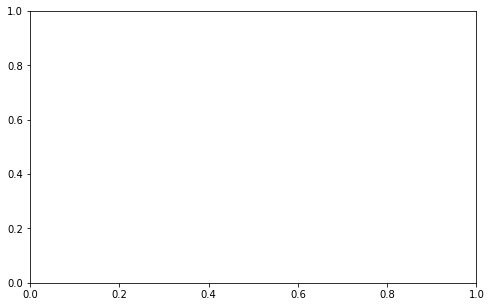

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.scatter(data.ROLE_TITLE,data.ROLE_CODE)

In [9]:
f = lambda x: x.unique().size
train.apply(f)

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

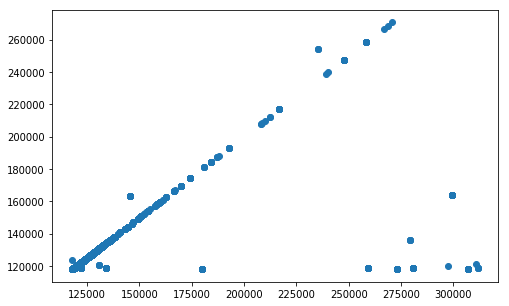

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
plt.scatter(train.ROLE_TITLE,train.ROLE_CODE)

In [13]:
TITLE_CODE = train.ROLE_TITLE*1000000+train.ROLE_CODE
TITLE_CODE.unique().size

343

In [17]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=35,
                             min_samples_leaf=2,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.9444


In [18]:
rf_res =  rf.predict(test)
submit['Action'] = rf_res
submit['Action'] = submit['Action'].astype(int)
submit.to_csv('submit.csv', index= False)

ValueError: Number of features of the model must match the input. Model n_features is 9 and input n_features is 10 

In [19]:
all_data = np.vstack((train_data.ix[:, 1:], test_data.ix[:, 1:]))

NameError: name 'train_data' is not defined

In [20]:
all_data = np.vstack((train.ix[:, 1:], test.ix[:, 1:]))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [21]:
all_data

array([[ 39353,  85475, 117961, ..., 117906, 290919, 117908],
       [ 17183,   1540, 117961, ..., 118536, 308574, 118539],
       [ 36724,  14457, 118219, ..., 267952,  19721, 117880],
       ..., 
       [ 39262,   6114, 117961, ..., 118260, 290919, 118279],
       [  1023,   8674, 117961, ..., 117906, 290919, 118322],
       [ 44977,   3918, 117961, ..., 133686, 118424, 119435]])

In [22]:
train

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [23]:
test

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
5,6,44722,1755,117961,117962,119223,125793,146749,118643,125795
6,7,75834,21135,117961,118343,123494,118054,118054,117887,118055
7,8,4675,3077,117961,118300,120312,124194,124195,118363,124196
8,9,18072,15575,117902,118041,118623,280788,280788,292795,119082
9,10,22680,4474,117961,118446,119064,118321,118448,290919,118322


In [24]:
 num_train = np.shape(train)[0]

In [25]:
num_train

32769